In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import preprocessing
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

importing Jupyter notebook from preprocessing.ipynb


In [2]:
data=preprocessing.df

In [3]:
data.shape

(247302, 30)

In [4]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [5]:
normal=normal.drop(['Class'],axis=1)
fraud=fraud.drop(['Class'],axis=1)

In [6]:
print(normal.shape, fraud.shape)

(246853, 29) (449, 29)


In [7]:
elpenv = EllipticEnvelope(contamination=0.0005,support_fraction = 0.9)
elpenv_f = EllipticEnvelope(contamination=0.0005,support_fraction = 0.9)
#0.002 0.66
#0.001 0.74
#0.0005 0.77
#0.0001 0.70

#both 0.0005  0.84
#both 0.001 0.83

In [8]:
elpenv.fit(normal)
normal_pred =  elpenv.predict(normal)
elpenv_f.fit(fraud)
fraud_pred = elpenv_f.predict(fraud)

In [9]:
normal['anomaly']=normal_pred
normal_outliers=normal.loc[normal['anomaly']==-1]
normal_outlier_index=list(normal_outliers.index)
print(normal['anomaly'].value_counts())
normal=normal.drop(['anomaly'],axis=1)

 1    246729
-1       124
Name: anomaly, dtype: int64


In [10]:
fraud['anomaly']=fraud_pred
fraud_outliers=fraud.loc[fraud['anomaly']==-1]
fraud_outlier_index=list(fraud_outliers.index)
print(fraud['anomaly'].value_counts())
fraud=fraud.drop(['anomaly'],axis=1)

 1    448
-1      1
Name: anomaly, dtype: int64


In [11]:
def pca_3d(X_data,outlier_index):
    pca = PCA(n_components=3) 
    scaler = StandardScaler()

    X = scaler.fit_transform(X_data)
    X_reduce = pca.fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlabel("x_composite_3")

    ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

    ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
    ax.legend()
    plt.show()


In [12]:
def pca_2d(X_data,outlier_index):
    pca = PCA(2)
    pca.fit(X_data)
    res=pd.DataFrame(pca.transform(X_data))
    Z = np.array(res)
    plt.title("IsolationForest")

    b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
    b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
    plt.legend(loc="upper right")
    plt.show()

In [13]:
X_data=data.iloc[:,:28]
X_data['Log amount']=data.iloc[:,29]
Y_data=data.iloc[:,28]

/home/sumin816/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
outlier_index=np.concatenate([normal_outlier_index, fraud_outlier_index])
# outlier_index=normal_outlier_index

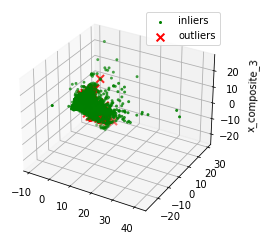

In [15]:
pca_3d(X_data,outlier_index)

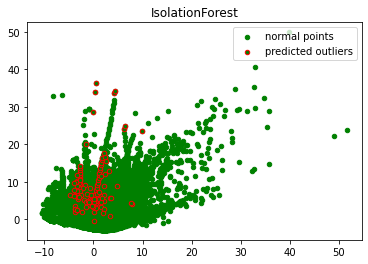

In [16]:
pca_2d(X_data,outlier_index)

In [17]:
X_data.drop(outlier_index,axis=0,inplace=True)
Y_data.drop(outlier_index,axis=0,inplace=True)

/home/sumin816/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247297,-0.685505,-0.277326,1.900544,-2.213269,-1.031180,0.480324,-0.860361,0.604277,0.579362,0.242419,...,0.084425,0.137453,0.652636,-0.196782,-0.505575,-0.287098,-0.265578,0.520126,0.260147,0.001000
247298,1.458305,-2.117138,-1.147928,-0.809323,-0.950119,0.170753,-0.511248,-0.125501,-0.105532,0.519438,...,0.875969,0.245424,-0.170900,-0.033591,0.047550,-0.518818,-0.469358,-0.054827,0.030833,5.991467
247299,-0.671530,-0.163224,2.050980,-2.010056,-1.249401,-0.033353,-0.663810,0.382260,0.692583,0.044298,...,0.112891,0.121122,0.675433,-0.149557,-0.031065,-0.285669,-0.275729,0.531661,0.275495,2.232270
247300,0.080243,0.914558,-1.144838,0.027907,0.050925,-1.305150,0.813779,0.109938,-0.113518,-1.175737,...,-0.106791,0.362855,0.892885,0.083734,-0.115643,-0.245846,-0.148970,-0.097911,-0.042843,4.445600


In [19]:
X_data=np.array(X_data)
Y_data=np.array(Y_data)

In [20]:
# scaler = StandardScaler()
# X_data = scaler.fit_transform(X_data)

In [21]:
print(Y_data.shape, X_data.shape)

(247177,) (247177, 29)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_data, Y_data)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [24]:
rf= RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)

In [25]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [26]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=777, stratify=Y_data)

In [27]:
skf = StratifiedKFold(n_splits=5)
k=5

In [28]:
result_Y_val=[]
result_Y_val_pred=[]
model =  rf

i=0
for train_index,val_index in skf.split(X_train_val,Y_train_val):
    i=i+1
    print(str(i),"번째 cross validation")
    X_train = X_train_val[train_index]
    Y_train = Y_train_val[train_index]  
    X_val = X_train_val[val_index]
    Y_val = Y_train_val[val_index]
    
    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_sample(X_train, Y_train)
    model.fit(X_train_oversampled, Y_train_oversampled)

    Y_val_pred = rf.predict(X_val)
    result_Y_val.append(Y_val)
    result_Y_val_pred.append(Y_val_pred)



1 번째 cross validation
2 번째 cross validation
3 번째 cross validation
4 번째 cross validation
5 번째 cross validation


In [29]:
Y_pred=model.predict(X_test)

In [30]:
def evaluation(Y_test,y_pred):
    acc= accuracy_score(Y_test,y_pred)
    print("accuracy : {}".format(acc))
    prec= precision_score(Y_test,y_pred)
    print("precision : {}".format(prec))
    rec= recall_score(Y_test,y_pred)
    print("recall: {}".format(rec))
    f1= f1_score(Y_test,y_pred)
    print("F1-Score : {}".format(f1))
    auc_score=roc_auc_score(Y_test,y_pred)
    print("auc_score: {}".format(auc_score))
    

In [31]:
for i in range(k):
    print("{} 번째 cross validation".format(i+1))
    evaluation(result_Y_val[i],result_Y_val_pred[i])
    print("\n")

1 번째 cross validation
accuracy : 0.9989633113353056
precision : 0.7066666666666667
recall: 0.7361111111111112
F1-Score : 0.7210884353741497
auc_score: 0.8677769122949228


2 번째 cross validation
accuracy : 0.9994689996965712
precision : 0.8378378378378378
recall: 0.8732394366197183
F1-Score : 0.8551724137931033
auc_score: 0.9364677310767867


3 번째 cross validation
accuracy : 0.9990897137655507
precision : 0.6966292134831461
recall: 0.8732394366197183
F1-Score : 0.775
auc_score: 0.9362777470354462


4 번째 cross validation
accuracy : 0.9991655709517548
precision : 0.7096774193548387
recall: 0.9166666666666666
F1-Score : 0.7999999999999999
auc_score: 0.9579913533961563


5 번째 cross validation
accuracy : 0.9993425710528977
precision : 0.7948717948717948
recall: 0.8611111111111112
F1-Score : 0.8266666666666667
auc_score: 0.9303529007779692




In [32]:
evaluation(Y_test,Y_pred)

accuracy : 0.9993931547859859
precision : 0.8191489361702128
recall: 0.8555555555555555
F1-Score : 0.8369565217391304
auc_score: 0.9276055247076201


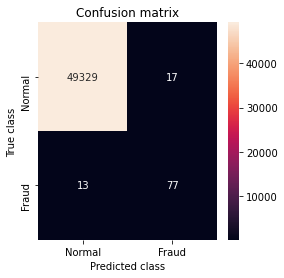

In [33]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
